## 중요 사항

- sklearn.model_selection -> cross_val_score 함수는 cross_validate 함수를 사용하여 test_score 키만 반환한다.
- cross_validate 함수는 분할마다 훈련과 테스트에 걸린 시간 및 훈련 점수와 테스트 점수를 반환한다.
- 교차 검증 함수는 모델을 반환하지 않는다. 교차 검증의 목적은 주어진 데이터셋에 학습된 알고리즘이 얼마나 잘 일반화될지 평가하는 것이다.
- cross_val_predict 함수는 각 폴드가 테스트 세트일 때 예측된 값을 반환한다.
- 불균형한 데이터셋에서는 정확도보다 AUC가 훨씬 좋은 지표이다.


In [4]:
from preamble import *

In [5]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 인위적인 데이터셋을 만듭니다
X, y = make_blobs(random_state=0)
# 데이터와 타깃 레이블을 훈련 세트와 테스트 세트로 나눕니다
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# 모델 객체를 만들고 훈련 세트로 학습시킵니다
logreg = LogisticRegression().fit(X_train, y_train)
# 모델을 테스트 세트로 평가합니다
print("테스트 세트 점수: {:.2f}".format(logreg.score(X_test, y_test)))

테스트 세트 점수: 0.88


## 5.1 교차 검증

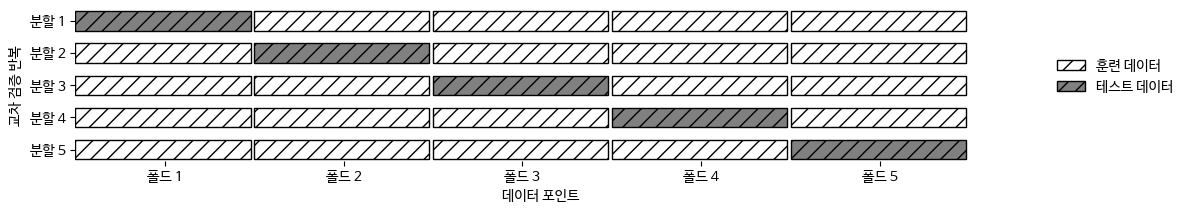

In [6]:
mglearn.plots.plot_cross_validation()

### 5.1.1 scikit-learn의 교차 검증

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression(max_iter=1000)

scores = cross_val_score(logreg, iris.data, iris.target)
print("교차 검증 점수:", scores)

교차 검증 점수: [0.967 1.    0.933 0.967 1.   ]


In [8]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=10)
print("교차 검증 점수:", scores)

교차 검증 점수: [1.    0.933 1.    1.    0.933 0.933 0.933 1.    1.    1.   ]


In [9]:
print("교차 검증 평균 점수: {:.2f}".format(scores.mean()))

교차 검증 평균 점수: 0.97


In [10]:
from sklearn.model_selection import cross_validate
res = cross_validate(logreg, iris.data, iris.target,
                     return_train_score=True)
res

{'fit_time': array([0.012, 0.009, 0.006, 0.006, 0.006]),
 'score_time': array([0., 0., 0., 0., 0.]),
 'test_score': array([0.967, 1.   , 0.933, 0.967, 1.   ]),
 'train_score': array([0.967, 0.967, 0.983, 0.983, 0.975])}

In [11]:
res_df = pd.DataFrame(res)
display(res_df)
print("평균 시간과 점수:\n", res_df.mean())

,fit_time,score_time,test_score,train_score
0,1.19e-02,1.57e-04,0.97,0.97
1,8.66e-03,1.45e-04,1.00,0.97
2,6.05e-03,1.07e-04,0.93,0.98
3,6.18e-03,8.11e-05,0.97,0.98
4,5.97e-03,1.07e-04,1.00,0.97


평균 시간과 점수:
 fit_time       7.75e-03
score_time     1.19e-04
test_score     9.73e-01
train_score    9.75e-01
dtype: float64


### 5.1.2 교차 검증의 장점

### 5.1.3 계층별 k-겹 교차 검증과 그외 전략들

폴드 안의 클래스 비율이 전체 데이터셋의 클래스 비율과 같도록 데이터를 나눈다.

In [12]:
from sklearn.datasets import load_iris
iris = load_iris()
print("Iris 레이블:\n", iris.target)

Iris 레이블:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


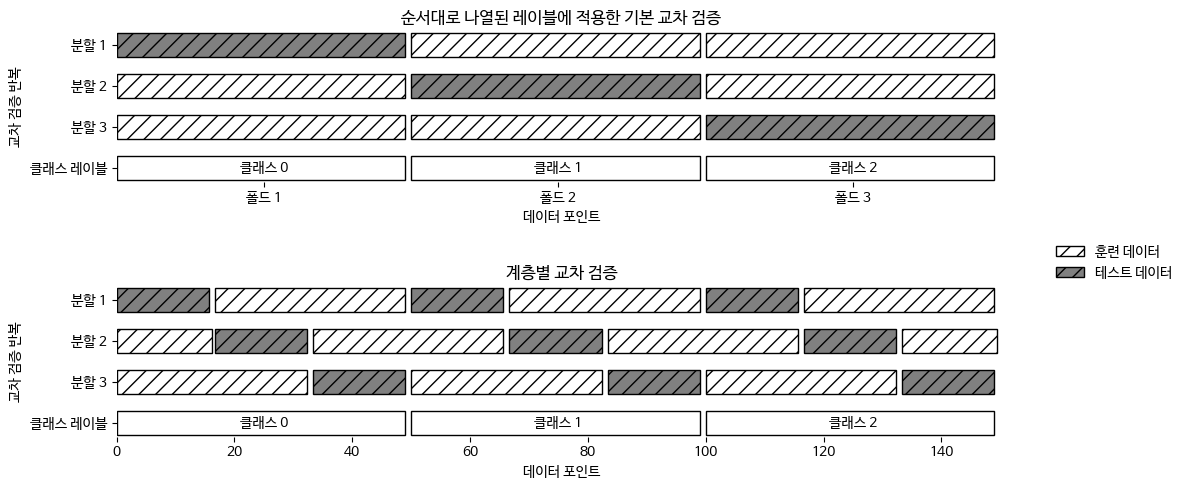

In [13]:
mglearn.plots.plot_stratified_cross_validation()

#### 교차 검증 상세 옵션

In [14]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

In [15]:
print("교차 검증 점수:\n",
      cross_val_score(logreg, iris.data, iris.target, cv=kfold))

교차 검증 점수:
 [1.    1.    0.867 0.933 0.833]


In [16]:
kfold = KFold(n_splits=3)
print("교차 검증 점수:\n",
      cross_val_score(logreg, iris.data, iris.target, cv=kfold))

교차 검증 점수:
 [0. 0. 0.]


In [17]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print("교차 검증 점수:\n",
    cross_val_score(logreg, iris.data, iris.target, cv=kfold))

교차 검증 점수:
 [0.98 0.96 0.96]


#### LOOCV(Leave-One-Out cross-validation)

In [18]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("교차 검증 분할 횟수: ", len(scores))
print("평균 정확도: {:.2f}".format(scores.mean()))

교차 검증 분할 횟수:  150
평균 정확도: 0.97


#### 임의 분할 교차 검증

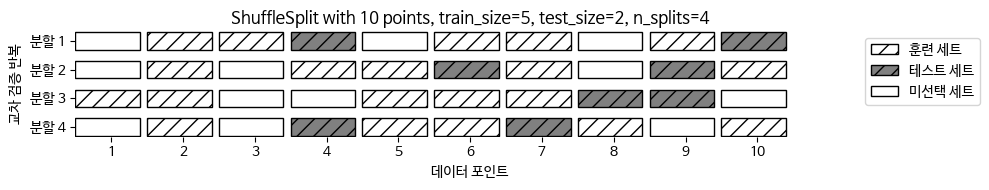

In [19]:
mglearn.plots.plot_shuffle_split()

In [20]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("교차 검증 점수:\n", scores)

교차 검증 점수:
 [0.947 0.947 0.947 0.973 0.947 0.987 0.933 0.987 0.987 0.907]


#### 그룹별 교차 검증

In [21]:
from sklearn.model_selection import GroupKFold
# 인위적 데이터셋 생성
X, y = make_blobs(n_samples=12, random_state=0)
# 처음 세 개의 샘플은 같은 그룹에 속하고
# 다음은 네 개의 샘플이 같습니다.
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups=groups, cv=GroupKFold(n_splits=3))
print("교차 검증 점수:\n", scores)

교차 검증 점수:
 [0.75  0.6   0.667]


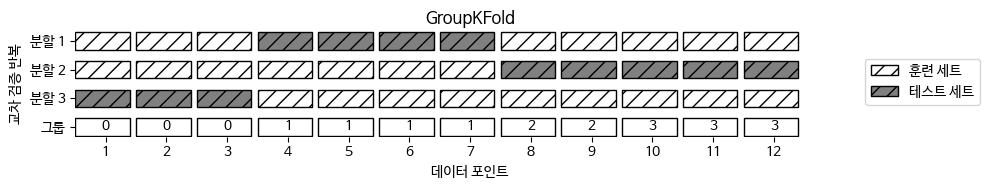

In [22]:
mglearn.plots.plot_group_kfold()

### 5.1.4 반복 교차 검증

In [89]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression(max_iter=1000)

In [90]:
from sklearn.model_selection import RepeatedStratifiedKFold

rskfold = RepeatedStratifiedKFold(random_state=42)
scores = cross_val_score(logreg, iris.data, iris.target, cv=rskfold)

print("교차 검증 점수:\n", scores)
print("교차 검증 평균 점수: {:.3f}".format(scores.mean()))

교차 검증 점수:
 [1.    0.967 0.933 1.    0.933 0.967 0.967 0.933 1.    0.967 0.933 1.
 1.    0.967 0.967 0.9   1.    1.    0.933 0.967 0.933 0.967 0.967 1.
 0.967 1.    0.967 0.967 0.9   1.    0.967 0.967 0.967 0.967 0.933 0.967
 0.967 1.    1.    0.9   0.967 1.    0.9   0.967 0.967 0.9   0.967 0.967
 1.    0.967]
교차 검증 평균 점수: 0.965


## 5.2 그리드 서치(Grid Search)

### 5.2.1 간단한 그리드 서치

In [23]:
# 간단한 그리드 서치 구현
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                    random_state=0)
print("훈련 세트의 크기: {}   테스트 세트의 크기: {}".format(
      X_train.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 매개변수의 각 조합에 대해 SVC를 훈련시킵니다
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # 테스트 세트로 SVC를 평가합니다
        score = svm.score(X_test, y_test)
        # 점수가 더 높으면 매개변수와 함께 기록합니다
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
            
print("최고 점수: {:.2f}".format(best_score))
print("최적 파라미터:", best_parameters)

훈련 세트의 크기: 112   테스트 세트의 크기: 38
최고 점수: 0.97
최적 파라미터: {'C': 100, 'gamma': 0.001}


### 5.2.2 매개변수 과대적합과 검증 세트

In [25]:
from sklearn.svm import SVC
# 데이터를 훈련+검증 세트 그리고 테스트 세트로 분할
X_trainval, X_test, y_trainval, y_test = train_test_split(
    iris.data, iris.target, random_state=0)
# 훈련+검증 세트를 훈련 세트와 검증 세트로 분할
X_train, X_valid, y_train, y_valid = train_test_split(
    X_trainval, y_trainval, random_state=1)
print("훈련 세트의 크기: {}   검증 세트의 크기: {}   테스트 세트의 크기:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 매개변수의 각 조합에 대해 SVC를 훈련시킵니다
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # 검증 세트로 SVC를 평가합니다
        score = svm.score(X_valid, y_valid)
        # 점수가 더 높으면 매개변수와 함께 기록합니다
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

# 훈련 세트와 검증 세트를 합쳐 모델을 다시 만든 후
# 테스트 세트를 사용해 평가합니다
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("검증 세트에서 최고 점수: {:.2f}".format(best_score))
print("최적 파라미터: ", best_parameters)
print("최적 파라미터에서 테스트 세트 점수: {:.2f}".format(test_score))

훈련 세트의 크기: 84   검증 세트의 크기: 28   테스트 세트의 크기: 38

검증 세트에서 최고 점수: 0.96
최적 파라미터:  {'C': 10, 'gamma': 0.001}
최적 파라미터에서 테스트 세트 점수: 0.92


### 5.2.3 교차 검증을 사용한 그리드 서치

GridSearchCV 객체에서 선택한 매개변수는 best_params_ 속성에 담겨 있고, 최상의 교차 검증 정확도는 best_score_ 속성에 저장되어 있다.

연산 비용이 매우 크므로 비교적 간격을 넓게 하여 적은 수의 그리드로 시작하는 것이 좋다. 그런 다음 결과를 분석하여 검색을 확장해 나간다.

그리드 서치 결과는 cv_results_ 속성에 담겨 있다.(딕셔너리) -> 데이터프레임으로 변환해 보는 게 좋다.

In [26]:
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 매개변수의 각 조합에 대해 SVC를 훈련시킵니다
        svm = SVC(gamma=gamma, C=C)
        # 교차 검증을 적용합니다
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        # 교차 검증 정확도의 평균을 계산합니다
        score = np.mean(scores)
        # 점수가 더 높으면 매개변수와 함께 기록합니다
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
# 훈련 세트와 검증 세트를 합쳐 모델을 다시 만듭니다
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=10, gamma=0.1)

In [29]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("매개변수 그리드:\n", param_grid)

매개변수 그리드:
 {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                    random_state=0)

In [32]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [33]:
print("테스트 세트 점수: {:.2f}".format(grid_search.score(X_test, y_test)))

테스트 세트 점수: 0.97


In [34]:
print("최적 매개변수:", grid_search.best_params_)
print("최고 교차 검증 점수: {:.2f}".format(grid_search.best_score_))

최적 매개변수: {'C': 10, 'gamma': 0.1}
최고 교차 검증 점수: 0.97


In [35]:
print("최고 성능 모델:\n", grid_search.best_estimator_)

최고 성능 모델:
 SVC(C=10, gamma=0.1)


#### 교차 검증 결과 분석

In [36]:
import pandas as pd
pd.set_option('display.max_columns', None)
# DataFrame으로 변환합니다
results = pd.DataFrame(grid_search.cv_results_)
# 처음 다섯 개 행을 출력합니다
np.transpose(results.head())

,0,1,2,3,4
mean_fit_time,0.0,0.0,0.0,0.0,0.0
std_fit_time,0.0,0.0,0.0,0.0,0.0
mean_score_time,0.0,0.0,0.0,0.0,0.0
std_score_time,0.0,0.0,0.0,0.0,0.0
param_C,0.0,0.0,0.0,0.0,0.0
param_gamma,0.0,0.01,0.1,1,10
params,"{'C': 0.001, 'gamma': 0.001}","{'C': 0.001, 'gamma': 0.01}","{'C': 0.001, 'gamma': 0.1}","{'C': 0.001, 'gamma': 1}","{'C': 0.001, 'gamma': 10}"
split0_test_score,0.35,0.35,0.35,0.35,0.35
split1_test_score,0.35,0.35,0.35,0.35,0.35
split2_test_score,0.36,0.36,0.36,0.36,0.36


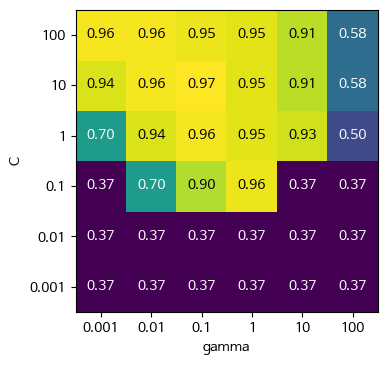

In [37]:
scores = np.array(results.mean_test_score).reshape(6, 6)

# 교차 검증 평균 점수 히트맵 그래프
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
                      ylabel='C', yticklabels=param_grid['C'], cmap="viridis")
plt.show() # 책에는 없음

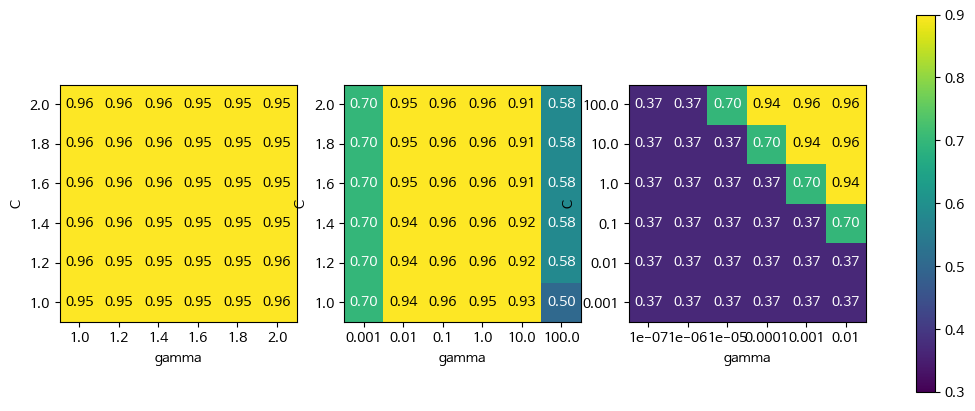

In [38]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))

param_grid_linear = {'C': np.linspace(1, 2, 6),
                     'gamma':  np.linspace(1, 2, 6)}

param_grid_one_log = {'C': np.linspace(1, 2, 6),
                     'gamma':  np.logspace(-3, 2, 6)}

param_grid_range = {'C': np.logspace(-3, 2, 6),
                     'gamma':  np.logspace(-7, -2, 6)}

for param_grid, ax in zip([param_grid_linear, param_grid_one_log,
                           param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)

    # 교차 검증 평균 점수의 히트맵 그래프
    scores_image = mglearn.tools.heatmap(
        scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'],
        yticklabels=param_grid['C'], cmap="viridis", ax=ax, vmin=0.3, vmax=0.9)
    
plt.colorbar(scores_image, ax=axes.tolist())
plt.show() # 책에는 없음

#### 비대칭 매개변수 그리드 탐색

In [39]:
param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
print("그리드 목록:\n", param_grid)

그리드 목록:
 [{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [40]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("최적 파라미터:", grid_search.best_params_)
print("최고 교차 검증 점수: {:.2f}".format(grid_search.best_score_))

최적 파라미터: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
최고 교차 검증 점수: 0.97


In [41]:
results = pd.DataFrame(grid_search.cv_results_)
# 좀 더 나은 출력을 위해 결과를 전치시킵니다
results.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std_fit_time,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean_score_time,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std_score_time,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
param_C,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.01,0.01,0.01,0.01,0.01,0.1,0.1,0.1,0.1,0.1,0.1,1,1,1,1,1,1,10,10,10,10,10,10,100,100,100,100,100,100,0.0,0.01,0.1,1,10,100
param_gamma,0.0,0.01,0.1,1,10,100,0.0,0.01,0.1,1,10,100,0.0,0.01,0.1,1,10,100,0.0,0.01,0.1,1,10,100,0.0,0.01,0.1,1,10,100,0.0,0.01,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 100, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 1, 'gamma': 1, 'kernel': 'rbf'}","{'C': 1, 'gamma': 10, 'kernel': 'rbf'}","{'C': 1, 'gamma': 100, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 10, 'gamma': 1, 'kernel': 'rbf'}","{'C': 10, 'gamma': 10, 'kernel': 'rbf'}","{'C': 10, 'gamma': 100, 'kernel': 'rbf'}","{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 10, 'kernel': 'rbf'}","{'C': 100, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}"
split0_test_score,0.35,0.35,0.35,0.35,0.35,0.35,0.35,0.35,0.35,0.35,0.35,0.35,0.35,0.7,0.91,1.0,0.35,0.35,0.7,0.91,1.0,0.96,0.91,0.39,0.91,1.0,1.0,0.96,0.87,0.52,1.0,1.0,1.0,0.96,0.87,0.52,0.35,0.87,1.0,1.0,1.0,0.96
split1_test_score,0.35,0.35,0.35,0.35,0.35,0.35,0.35,0.35,0.35,0.35,0.35,0.35,0.35,0.7,0.91,0.91,0.35,0.35,0.7,0.91,0.96,0.91,0.96,0.43,0.91,0.96,0.96,0.96,0.91,0.52,0.96,0.91,0.96,0.96,0.91,0.52,0.35,0.87,0.91,0.96,1.0,0.96


#### 그리드 서치에 다양한 교차 검증 적용

#### 중첩 교차 검증

In [42]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5),
                         iris.data, iris.target, cv=5)
print("교차 검증 점수: ", scores)
print("교차 검증 평균 점수: ", scores.mean())

교차 검증 점수:  [0.967 1.    0.967 0.967 1.   ]
교차 검증 평균 점수:  0.9800000000000001


In [43]:
def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid):
    outer_scores = []
    # outer_cv의 분할을 순회하는 for 루프
    # (split 메소드는 훈련과 테스트 세트에 해당하는 인덱스를 리턴합니다)
    for training_samples, test_samples in outer_cv.split(X, y):
        # 최적의 매개변수를 찾습니다
        best_parms = {}
        best_score = -np.inf
        # 매개변수 그리드를 순회합니다
        for parameters in parameter_grid:
            # 안쪽 교차 검증의 점수를 기록합니다
            cv_scores = []
            # inner_cv의 분할을 순회하는 for 루프
            for inner_train, inner_test in inner_cv.split(
                    X[training_samples], y[training_samples]):
                # 훈련 데이터와 주어진 매개변수로 분류기를 만듭니다
                clf = Classifier(**parameters)
                clf.fit(X[inner_train], y[inner_train])
                # 검증 세트로 평가합니다
                score = clf.score(X[inner_test], y[inner_test])
                cv_scores.append(score)
            # 안쪽 교차 검증의 평균 점수를 계산합니다
            mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                # 점수가 더 높은면 매개변수와 함께 기록합니다
                best_score = mean_score
                best_params = parameters
        # 바깥쪽 훈련 데이터 전체를 사용해 분류기를 만듭니다
        clf = Classifier(**best_params)
        clf.fit(X[training_samples], y[training_samples])
        # 테스트 세트를 사용해 평가합니다
        outer_scores.append(clf.score(X[test_samples], y[test_samples]))
    return np.array(outer_scores)

In [44]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold
scores = nested_cv(iris.data, iris.target, StratifiedKFold(5),
                   StratifiedKFold(5), SVC, ParameterGrid(param_grid))
print("교차 검증 점수:", scores)

교차 검증 점수: [0.967 1.    0.967 0.967 1.   ]


#### 교차 검증과 그리드 서치 병렬화

#### RandomizedSearchCV

In [45]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils.fixes import loguniform

param_dist = [{'kernel': ['rbf'],
               'C': loguniform(0.001, 100),
               'gamma': loguniform(0.001, 100)},
              {'kernel': ['linear'],
               'C': loguniform(0.001, 100)}]

In [46]:
rand_search = RandomizedSearchCV(SVC(), param_dist, n_iter=20, 
                                 random_state=42, n_jobs=-1)
rand_search.fit(X_train, y_train)
print("최적 파라미터:", rand_search.best_params_)
print("최고 교차 검증 점수: {:.2f}".format(rand_search.best_score_))

최적 파라미터: {'C': 1.7965626423790642, 'kernel': 'linear'}
최고 교차 검증 점수: 0.97


In [47]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
halv_search = HalvingGridSearchCV(SVC(), param_grid, verbose=1,
                                  random_state=42, n_jobs=-1)
halv_search.fit(X_train, y_train)
print()
print("최적 파라미터:", halv_search.best_params_)
print("최고 교차 검증 점수: {:.2f}".format(halv_search.best_score_))

n_iterations: 2
n_required_iterations: 4
n_possible_iterations: 2
min_resources_: 30
max_resources_: 112
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 42
n_resources: 30
Fitting 5 folds for each of 42 candidates, totalling 210 fits
----------
iter: 1
n_candidates: 14
n_resources: 90
Fitting 5 folds for each of 14 candidates, totalling 70 fits

최적 파라미터: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
최고 교차 검증 점수: 0.97


In [48]:
print('자원 리스트:', halv_search.n_resources_)
print('후보 리스트:', halv_search.n_candidates_)

자원 리스트: [30, 90]
후보 리스트: [42, 14]


## 5.3 평가 지표 및 측정

### 5.3.2 이진 분류의 평가 지표

##### 불균형 데이터셋

In [49]:
from sklearn.datasets import load_digits

digits = load_digits()
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, y, random_state=0)

In [50]:
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("예측된 레이블의 고유값:", np.unique(pred_most_frequent))
print("테스트 점수: {:.2f}".format(dummy_majority.score(X_test, y_test)))

예측된 레이블의 고유값: [False]
테스트 점수: 0.90


In [51]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("테스트 점수: {:.2f}".format(tree.score(X_test, y_test)))

테스트 점수: 0.92


In [52]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier(strategy='stratified').fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("dummy 점수: {:.2f}".format(dummy.score(X_test, y_test)))

logreg = LogisticRegression(C=0.1, max_iter=1000).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg 점수: {:.2f}".format(logreg.score(X_test, y_test)))

dummy 점수: 0.80
logreg 점수: 0.98


##### 오차 행렬(Confusion matrices)

In [53]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print("오차 행렬:\n", confusion)

오차 행렬:
 [[402   1]
 [  6  41]]


In [56]:
print("빈도 기반 더미 모델:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\n무작위 더미 모델:")
print(confusion_matrix(y_test, pred_dummy))
print("\n결정 트리:")
print(confusion_matrix(y_test, pred_tree))
print("\n로지스틱 회귀")
print(confusion_matrix(y_test, pred_logreg))

빈도 기반 더미 모델:
[[403   0]
 [ 47   0]]

무작위 더미 모델:
[[360  43]
 [ 44   3]]

결정 트리:
[[390  13]
 [ 24  23]]

로지스틱 회귀
[[402   1]
 [  6  41]]


#### ConfusionMatrixDisplay

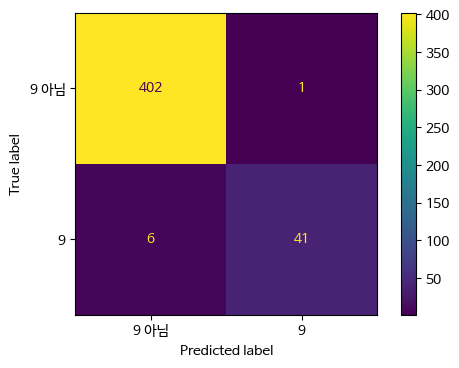

In [57]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test, 
                                      display_labels=['9 아님', '9'])
plt.show()

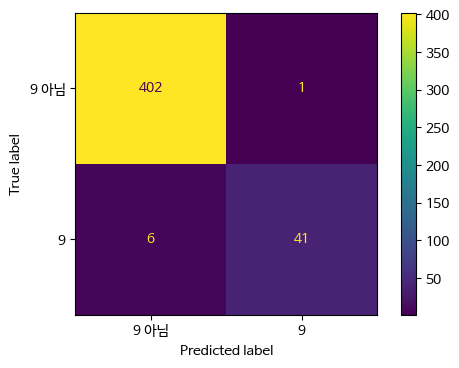

In [58]:
ConfusionMatrixDisplay.from_predictions(y_test, pred_logreg,
                                      display_labels=['9 아님', '9'])
plt.show()

###### 정확도와의 관계
$$\begin{equation}
\text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}
\end{equation}$$

###### 정밀도, 재현율, f-점수
$$\begin{equation}
\text{정밀도} = \frac{\text{TP}}{\text{TP} + \text{FP}}
\end{equation}$$

$$
\begin{equation}
\text{재현율} = \frac{\text{TP}}{\text{TP} + \text{FN}}
\end{equation}$$

$$\begin{equation}
\text{F} = 2 \cdot \frac{\text{정밀도} \cdot \text{재현율}}{\text{정밀도} + \text{재현율}}
\end{equation}$$

In [59]:
from sklearn.metrics import f1_score
print("빈도 기반 더미 모델의 f1 score: {:.2f}".format(
    f1_score(y_test, pred_most_frequent)))
print("무작위 더미 모델의 f1 score: {:.2f}".format(f1_score(y_test, pred_dummy)))
print("트리 모델의 f1 score: {:.2f}".format(f1_score(y_test, pred_tree)))
print("로지스틱 회귀 모델의 f1 score: {:.2f}".format(
    f1_score(y_test, pred_logreg)))

빈도 기반 더미 모델의 f1 score: 0.00
무작위 더미 모델의 f1 score: 0.06
트리 모델의 f1 score: 0.55
로지스틱 회귀 모델의 f1 score: 0.92


##### classification_report

- 클래스마다 한 줄씩 출력을 만들어 각 클래스가 양성일 때 정밀도, 재현율, f-점수 표시
- support는 이 클래스에 대한 지지도로 단순히 이 클래스에 있는 진짜 샘플의 수 표시
- 마지막 세 줄은 정밀도, 재현율, f-점수 평균 표시. macro avg는 클래스별 점수 평균이고, weighted avg는 클래스 샘플수로 가중 평균한 것이다.

In [60]:
from sklearn.metrics import classification_report
# 0 나눗셈 경고를 피하기 위해 zero_division 매개변수를 0으로 지정합니다.
print(classification_report(y_test, pred_most_frequent,
                            target_names=["9 아님", "9"], zero_division=0))

              precision    recall  f1-score   support

        9 아님       0.90      1.00      0.94       403
           9       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



#### 불확실성 고려

In [63]:
X, y = make_blobs(n_samples=(400, 50), cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)

In [65]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

    accuracy                           0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



암 진단 예와 같이 클래스 1의 recall을 높이는 게 중요하다고 가정하면 임계값을 바꿔 예측을 조정한다.

In [66]:
y_pred_lower_threshold = svc.decision_function(X_test) > -.8

In [67]:
print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       104
           1       0.32      1.00      0.49         9

    accuracy                           0.83       113
   macro avg       0.66      0.91      0.69       113
weighted avg       0.95      0.83      0.87       113



#### 정밀도-재현율 곡선과 ROC 곡선

In [68]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(
    y_test, svc.decision_function(X_test))

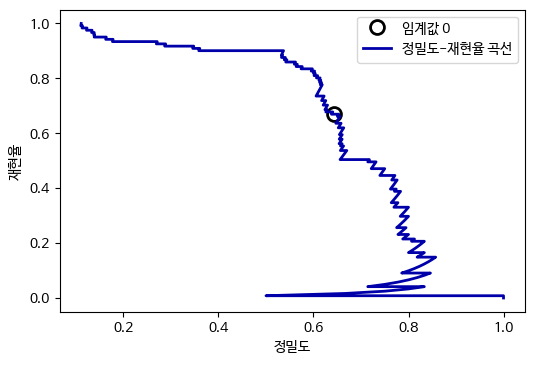

In [69]:
# 부드러운 곡선을 위해 데이터 포인트 수를 늘립니다
X, y = make_blobs(n_samples=(4000, 500), cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

svc = SVC(gamma=.05).fit(X_train, y_train)

precision, recall, thresholds = precision_recall_curve(
    y_test, svc.decision_function(X_test))
# 0에 가까운 임계값을 찾습니다
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="임계값 0", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="정밀도-재현율 곡선")
plt.xlabel("정밀도")
plt.ylabel("재현율")
plt.legend(loc="best")
plt.show() # 책에는 없음

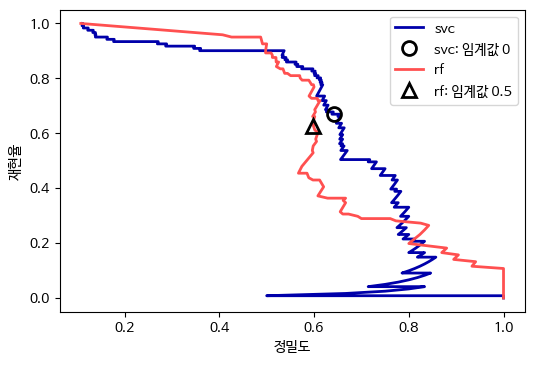

In [70]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

# RandomForestClassifier는 decision_function 대신 predict_proba를 제공합니다.
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(
    y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(precision, recall, label="svc")

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="svc: 임계값 0", fillstyle="none", c='k', mew=2)

plt.plot(precision_rf, recall_rf, label="rf")

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k',
         markersize=10, label="rf: 임계값 0.5", fillstyle="none", mew=2)
plt.xlabel("정밀도")
plt.ylabel("재현율")
plt.legend(loc="best")
plt.show() # 책에는 없음

In [71]:
print("랜덤 포레스트의 f1_score: {:.3f}".format(
    f1_score(y_test, rf.predict(X_test))))
print("svc의 f1_score: {:.3f}".format(f1_score(y_test, svc.predict(X_test))))

랜덤 포레스트의 f1_score: 0.610
svc의 f1_score: 0.656


In [72]:
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print("랜덤 포레스트의 평균 정밀도: {:.3f}".format(ap_rf))
print("svc의 평균 정밀도: {:.3f}".format(ap_svc))

랜덤 포레스트의 평균 정밀도: 0.660
svc의 평균 정밀도: 0.666


#### PrecisionRecallDisplay

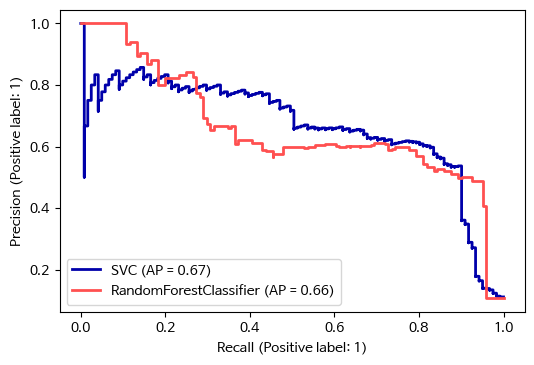

In [73]:
from sklearn.metrics import PrecisionRecallDisplay

fig, ax = plt.subplots()
# SVC 곡선 그리기
PrecisionRecallDisplay.from_estimator(svc, X_test, y_test, ax=ax)
# 랜덤 포레스트 곡선 그리기
PrecisionRecallDisplay.from_estimator(rf, X_test, y_test, ax=ax)
plt.show()

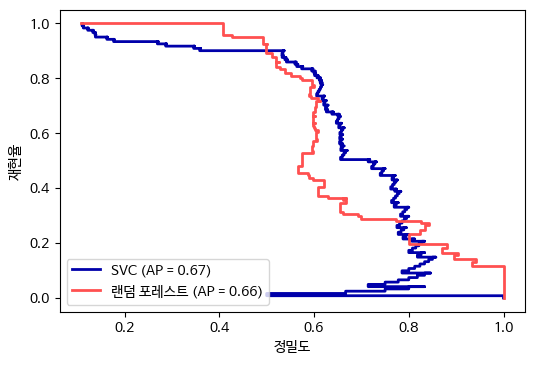

In [74]:
fig, ax = plt.subplots()
# SVC 곡선 그리기
disp = PrecisionRecallDisplay(precision=recall, recall=precision, 
                              average_precision=ap_svc, 
                              estimator_name='SVC')
disp.plot(ax=ax)
# 랜덤 포레스트 곡선 그리기
disp = PrecisionRecallDisplay(precision=recall_rf, recall=precision_rf, 
                              average_precision=ap_rf,
                              estimator_name='랜덤 포레스트')
disp.plot(ax=ax)
ax.set(xlabel='정밀도', ylabel='재현율')
plt.show()

#### ROC 와 AUC
\begin{equation}
\text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}}
\end{equation}

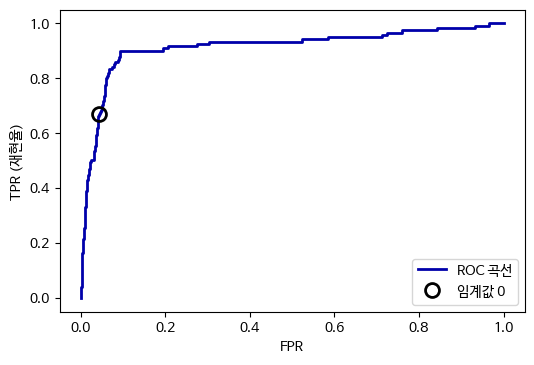

In [75]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))

plt.plot(fpr, tpr, label="ROC 곡선")
plt.xlabel("FPR")
plt.ylabel("TPR (재현율)")
# 0 근처의 임계값을 찾습니다
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="임계값 0", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)
plt.show() # 책에는 없음

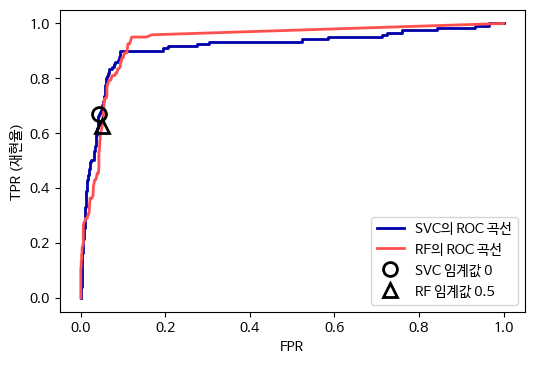

In [76]:
from sklearn.metrics import roc_curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, label="SVC의 ROC 곡선")
plt.plot(fpr_rf, tpr_rf, label="RF의 ROC 곡선")

plt.xlabel("FPR")
plt.ylabel("TPR (재현율)")
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="SVC 임계값 0", fillstyle="none", c='k', mew=2)
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr_rf[close_default_rf], '^', markersize=10,
         label="RF 임계값 0.5", fillstyle="none", c='k', mew=2)

plt.legend(loc=4)
plt.show() # 책에는 없음

In [77]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print("랜덤 포레스트의 AUC: {:.3f}".format(rf_auc))
print("SVC의 AUC: {:.3f}".format(svc_auc))

랜덤 포레스트의 AUC: 0.937
SVC의 AUC: 0.916


#### RocCurveDisplay

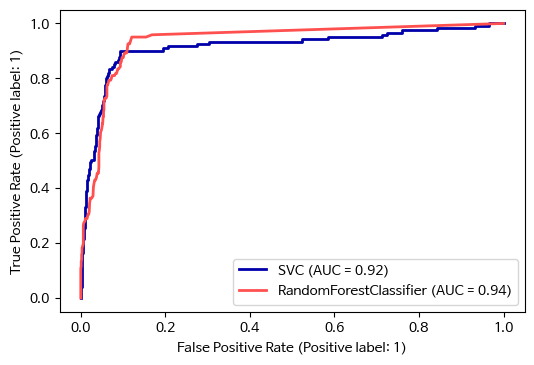

In [78]:
from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots()
# SVC 곡선 그리기
RocCurveDisplay.from_estimator(svc, X_test, y_test, ax=ax)
# 랜덤 포레스트 곡선 그리기
RocCurveDisplay.from_estimator(rf, X_test, y_test, ax=ax)
plt.show()

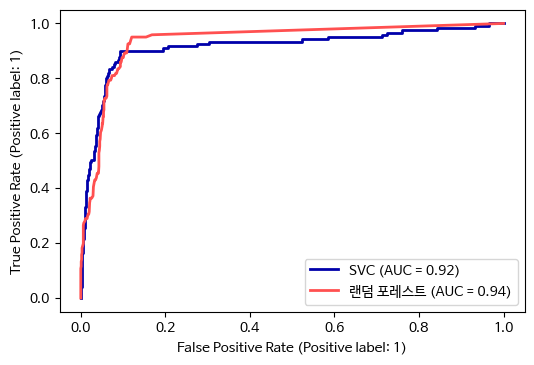

In [79]:
fig, ax = plt.subplots()
# SVC 곡선 그리기
RocCurveDisplay.from_predictions(y_test, svc.decision_function(X_test), 
                                 name='SVC', ax=ax)
# 랜덤 포레스트 곡선 그리기
RocCurveDisplay.from_predictions(y_test, rf.predict_proba(X_test)[:, 1], 
                                 name='랜덤 포레스트', ax=ax)
plt.show()

gamma = 1.00  정확도 = 0.90  AUC = 0.50
gamma = 0.10  정확도 = 0.90  AUC = 0.96
gamma = 0.01  정확도 = 0.90  AUC = 1.00


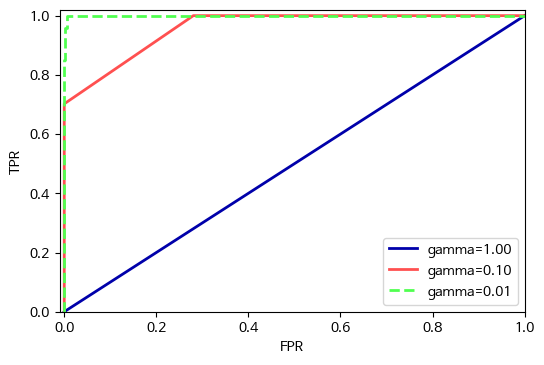

In [80]:
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, y, random_state=0)

plt.figure()

for gamma in [1, 0.1, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test , svc.decision_function(X_test))
    print("gamma = {:.2f}  정확도 = {:.2f}  AUC = {:.2f}".format(
        gamma, accuracy, auc))
    plt.plot(fpr, tpr, label="gamma={:.2f}".format(gamma))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc="best")
plt.show() # 책에는 없음

### 5.3.3 다중 분류의 평가 지표

In [81]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=0)
lr = LogisticRegression(max_iter=5000).fit(X_train, y_train)
pred = lr.predict(X_test)
print("정확도: {:.3f}".format(accuracy_score(y_test, pred)))
print("오차 행렬:\n", confusion_matrix(y_test, pred))

정확도: 0.953
오차 행렬:
 [[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  1  0]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  1  0 43  0]
 [ 0  0  0  0  0  1  0  0  2 44]]


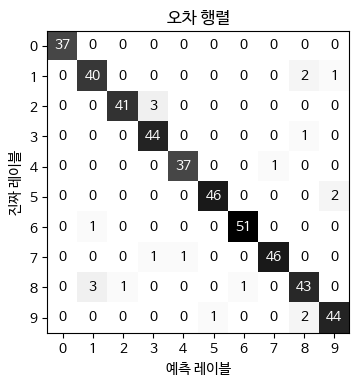

In [82]:
scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_test, pred), xlabel='예측 레이블',
    ylabel='진짜 레이블', xticklabels=digits.target_names,
    yticklabels=digits.target_names, cmap=plt.cm.gray_r, fmt="%d")    
plt.title("오차 행렬")
plt.gca().invert_yaxis()

In [83]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.93      0.92        43
           2       0.98      0.93      0.95        44
           3       0.92      0.98      0.95        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       0.98      0.98      0.98        52
           7       0.98      0.96      0.97        48
           8       0.90      0.90      0.90        48
           9       0.94      0.94      0.94        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



In [84]:
print("micro 평균 f1 점수: {:.3f}".format(f1_score(y_test, pred, average="micro")))
print("macro 평균 f1 점수: {:.3f}".format(f1_score(y_test, pred, average="macro")))

micro 평균 f1 점수: 0.953
macro 평균 f1 점수: 0.954


### 5.3.4 회귀 평가 지표

### 5.3.5 모델 선택에서 평가 지표 사용하기

In [85]:
# 분류의 기본 평가 지표는 정확도 입니다
print("기본 평가 지표:",
      cross_val_score(SVC(), digits.data, digits.target == 9, cv=5))
# scoring="accuracy"의 결과와 같습니다.
explicit_accuracy =  cross_val_score(SVC(), digits.data, digits.target == 9,
                                     scoring="accuracy", cv=5)
print("정확도 지표:", explicit_accuracy)
ap =  cross_val_score(SVC(), digits.data, digits.target == 9,
                           scoring="average_precision", cv=5)
print("평균 정밀도 지표:", ap)

기본 평가 지표: [0.975 0.992 1.    0.994 0.981]
정확도 지표: [0.975 0.992 1.    0.994 0.981]
평균 정밀도 지표: [0.976 0.989 1.    0.999 0.95 ]


In [86]:
res = cross_validate(SVC(), digits.data, digits.target == 9,
                     scoring=["accuracy", "average_precision", "recall_macro"],
                     return_train_score=True, cv=5)
pd.DataFrame(res)

,fit_time,score_time,test_accuracy,train_accuracy,test_average_precision,train_average_precision,test_recall_macro,train_recall_macro
0,1.05e-02,0.01,0.97,0.99,0.98,0.99,0.89,0.97
1,9.89e-03,0.01,0.99,1.00,0.99,1.00,0.96,0.98
2,1.04e-02,0.01,1.00,1.00,1.00,1.00,1.00,0.98
3,1.01e-02,0.01,0.99,1.00,1.00,1.00,0.97,0.98
4,9.87e-03,0.01,0.98,1.00,0.95,1.00,0.90,0.99


In [87]:
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target == 9, random_state=0)

# 일부러 적절하지 않은 그리드를 만듭니다
param_grid = {'gamma': [0.0001, 0.01, 0.1, 1, 10]}
# 기본 정확도 측정 지표를 사용합니다
grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)
print("정확도 지표를 사용한 그리드 서치")
print("최적의 파라미터:", grid.best_params_)
print("최상의 교차 검증 점수 (정확도)): {:.3f}".format(grid.best_score_))
print("테스트 세트 평균 정밀도: {:.3f}".format(
      average_precision_score(y_test, grid.decision_function(X_test))))
print("테스트 세트 정확도: {:.3f}".format(
      # grid.score 점수와 동일합니다
      accuracy_score(y_test, grid.predict(X_test))))

정확도 지표를 사용한 그리드 서치
최적의 파라미터: {'gamma': 0.0001}
최상의 교차 검증 점수 (정확도)): 0.976
테스트 세트 평균 정밀도: 0.966
테스트 세트 정확도: 0.973


In [88]:
# 평균 정밀도 지표 사용
grid = GridSearchCV(SVC(), param_grid=param_grid, scoring="average_precision")
grid.fit(X_train, y_train)
print("평균 정밀도 지표를 사용한 그리드 서치")
print("최적의 파라미터:", grid.best_params_)
print("최상의 교차 검증 점수 (평균 정밀도): {:.3f}".format(grid.best_score_))
print("테스트 세트 평균 정밀도: {:.3f}".format(
      # grid.score 점수와 동일합니다
      average_precision_score(y_test, grid.decision_function(X_test))))
print("테스트 세트 정확도: {:.3f}".format(
      accuracy_score(y_test, grid.predict(X_test))))

평균 정밀도 지표를 사용한 그리드 서치
최적의 파라미터: {'gamma': 0.01}
최상의 교차 검증 점수 (평균 정밀도): 0.988
테스트 세트 평균 정밀도: 0.996
테스트 세트 정확도: 0.896
